### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, matthews_corrcoef
#import color_palettes as cp

# Optional: Set the style for seaborn plots
sns.set_theme(style="whitegrid")
#sns.set_palette(cp.custom_color_palette('QModern.Miscellaneous_05'))

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read Data

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df_raw.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Display the entire DataFrame
display(df_raw.describe(include='all'))

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,82516.5000,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


### Exploratory Data Analysis 

In [7]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['id','CustomerId', 'Surname'], axis=1)


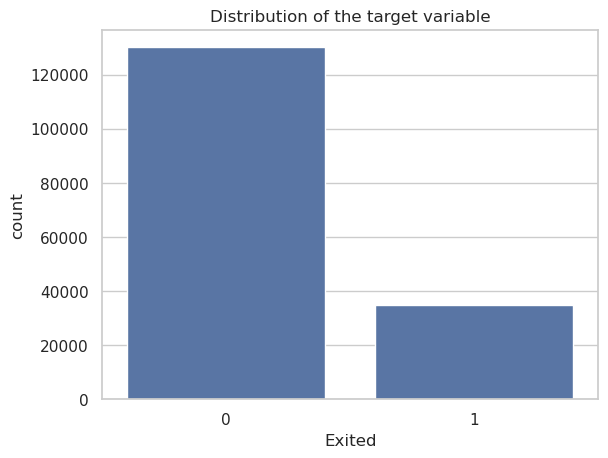

In [8]:
# Distribution of the target variable

sns.countplot(x='Exited', data=df)
plt.title('Distribution of the target variable')
plt.show()

In [9]:
# Copy the dataframe
df_eda = df.copy()

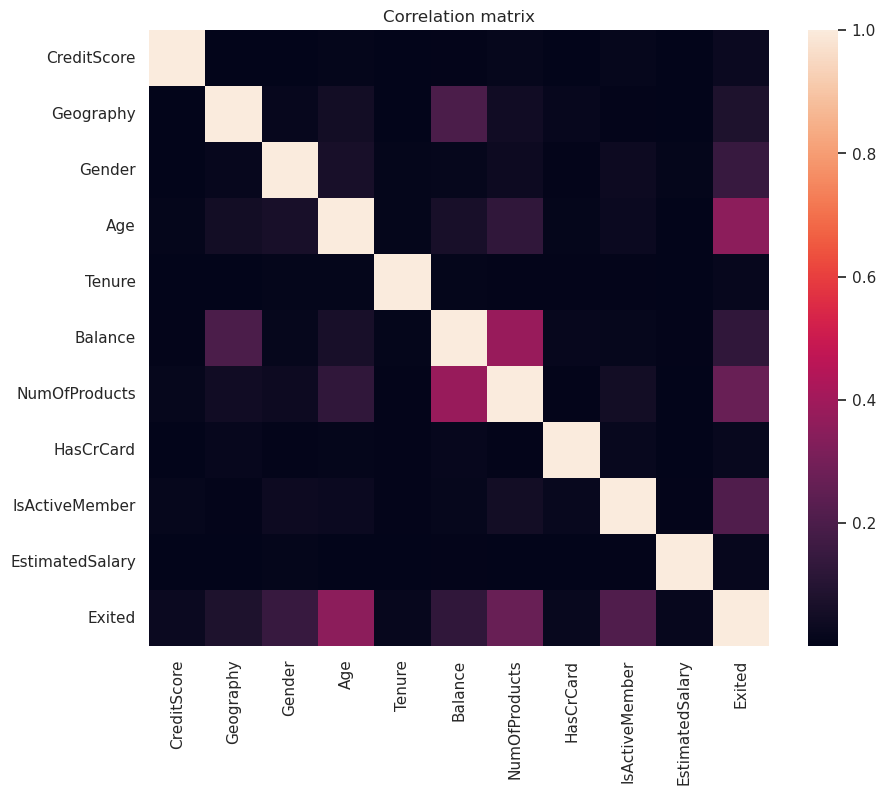

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns

# Transform categorical variables 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_eda[column] = label_encoder.fit_transform(df_eda[column].astype(str))

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

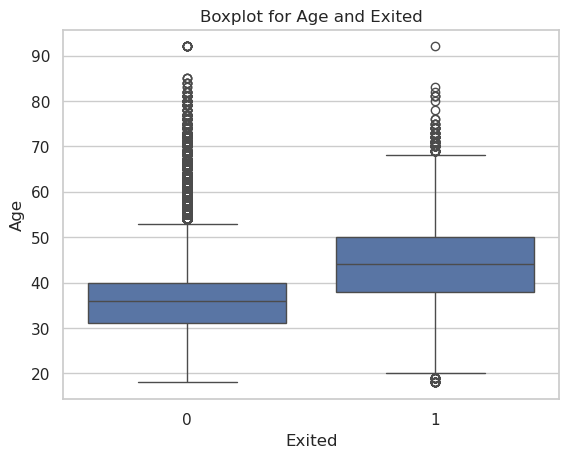

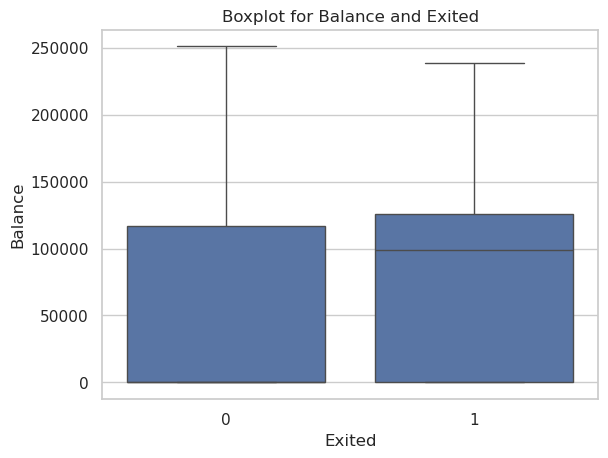

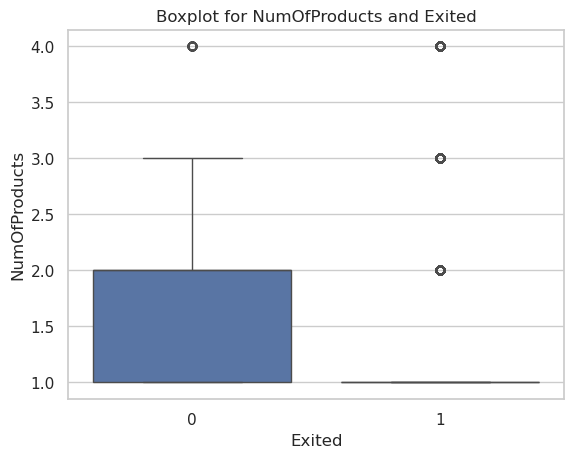

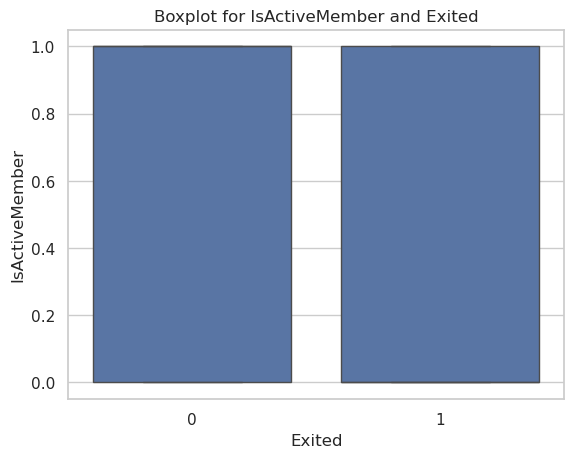

In [11]:
# Boxplot for Age and Exited
sns.boxplot(x='Exited', y='Age', data=df_eda)
plt.title('Boxplot for Age and Exited')
plt.show()

# Boxplot for Balance and Exited
sns.boxplot(x='Exited', y='Balance', data=df_eda)
plt.title('Boxplot for Balance and Exited')
plt.show()

# Boxplot for NumOfProducts and Exited
sns.boxplot(x='Exited', y='NumOfProducts', data=df_eda)
plt.title('Boxplot for NumOfProducts and Exited')
plt.show()

# Boxplot for IsActiveMember and Exited
sns.boxplot(x='Exited', y='IsActiveMember', data=df_eda)
plt.title('Boxplot for IsActiveMember and Exited')
plt.show()

In [12]:
# Geographic distribution of the customers

import folium

#world_geo = 'geoBoundaries.geojson' #https://www.geoboundaries.org/globalDownloads.html
world_geo = 'world_countries.json'

# Count the number of customers in each country
country_counts = df['Geography'].value_counts().reset_index()

# Latitude and longitude of France
latitude = 46.603354
longitude = 1.888334

# Create a map centered on France
bank_map = folium.Map(location=[latitude, longitude], zoom_start=4)

folium.Choropleth(
    geo_data=world_geo,
    data=country_counts,
    columns=['Geography', 'count'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Bank Costumers',
    nan_fill_opacity=0,
).add_to(bank_map)

# Display the map 
bank_map


### Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# Define the numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Display the numerical columns
print('Categorical features:', categorical_features)

# Identify boolean columns
boolean_features = [col for col in X.columns if set(X[col].unique()) <= {0, 1}]

# Display the boolean columns
print('Boolean features:', boolean_features)

# Delete the boolean columns from the numerical features
numerical_features = [col for col in numerical_features if col not in boolean_features]

# Display the numerical columns
print('Numerical features:', numerical_features)

Categorical features: Index(['Geography', 'Gender'], dtype='object')
Boolean features: ['HasCrCard', 'IsActiveMember']
Numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [15]:
#  Fix skewness in the numerical features
from scipy.stats import skew

# Calculate the skewness of the numerical features
skewness = X_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Filter the numerical features with skewness greater than 0.5
skewness = skewness[abs(skewness) > 0.5]

# Apply the Box-Cox transformation to fix the skewness
from scipy.special import boxcox1p

# Define the skewness transformation threshold
skewness_threshold = 0.5

# Apply the Box-Cox transformation to the numerical features with skewness greater than the threshold
for feature in skewness.index:
    X_train[feature] = boxcox1p(X_train[feature], 0.15)
    X_test[feature] = boxcox1p(X_test[feature], 0.15)

# Calculate the skewness of the transformed numerical features
skewness = X_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Display the skewness of the transformed numerical features
skewness


NumOfProducts      0.381996
Balance            0.380093
Age                0.309809
Tenure             0.008534
CreditScore       -0.060092
EstimatedSalary   -0.305160
dtype: float64

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Create the preprocessing pipelines for both numeric and categorical data

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define the preprocessor with passthrough for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # This will leave numerical features unchanged
)

# Fit and transform the training data without scaling
X_train_nonscaled = preprocessor.fit_transform(X_train)
X_test_nonscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Convert the scaled data to a DataFrame
feature_names = preprocessor.fit(X_train).get_feature_names_out()
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Convert the non-scaled data to a DataFrame
X_train_nonscaled_df = pd.DataFrame(X_train_nonscaled, columns=feature_names)
X_test_nonscaled_df = pd.DataFrame(X_test_nonscaled, columns=feature_names)

# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train.shape)
print(y_test.shape)

(115523, 13)
(49511, 13)
(115523,)
(49511,)


### Models

In [17]:
rs = 42

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

# Use Stratified KFold for preserving the class distribution
cv = StratifiedKFold(n_splits=5)

# Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Removed 'lbfgs' due to incompatibility with 'l1'
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}
logistic_model = LogisticRegression(random_state=rs)
logistic_grid = RandomizedSearchCV(logistic_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 21],  # Add higher values
    'weights': ['uniform', 'distance'],  # 'distance' can reduce overfitting
    'metric': ['manhattan', 'minkowski'],  # Use selective metrics
    'p': [1, 2],  # 1 for Manhattan, 2 for Euclidean
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_model = KNeighborsClassifier(weights='distance')
knn_grid = RandomizedSearchCV(knn_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

""" # SVM #Takes a lot of time to run
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'shrinking': [True, False],
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}

svm_model = SVC(random_state=rs)
svm_grid = RandomizedSearchCV(svm_model, param_grid, cv=cv, n_jobs=-1) """

# Gaussian Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
}

gnb_model = GaussianNB()
gnb_grid = RandomizedSearchCV(gnb_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# Decision Tree
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': np.linspace(0, 0.05, 50),
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}

dt_model = DecisionTreeClassifier(random_state=rs)
dt_grid = RandomizedSearchCV(dt_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Drop 'auto' to reduce complexity
    'bootstrap': [True],  # Generally bootstrap=True is better for reducing overfitting
    'ccp_alpha': np.linspace(0, 0.05, 50),
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}

rf_model = RandomForestClassifier(random_state=rs)
rf_grid = RandomizedSearchCV(rf_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# Extra Trees
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False],  # Extra Trees generally performs better without bootstrapping
    'ccp_alpha': np.linspace(0, 0.05, 50),
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}

et_model = ExtraTreesClassifier(random_state=rs)
et_grid = RandomizedSearchCV(et_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],  # Use lower learning rates to avoid overfitting
}

ab_model = AdaBoostClassifier(random_state=rs, algorithm='SAMME')
ab_grid = RandomizedSearchCV(ab_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# Neural Networks
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100), (100, 50, 100)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

mlp_model = MLPClassifier(random_state=rs, max_iter=5000, solver='adam', early_stopping=True)
mlp_grid = RandomizedSearchCV(mlp_model, param_grid, cv=cv, n_jobs=-1, scoring='f1')

# Models dictionary 
models = {
    'Logistic Regression': logistic_grid,
    'KNN': knn_grid,
    #'SVM': svm_grid,
    'Gaussian Naive Bayes': gnb_grid,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid,
    'Extra Trees': et_grid,
    'AdaBoost': ab_grid,
    'Neural Networks': mlp_grid
}

### Model training and Evaluation

In [19]:
### Con non scaled data los resultados son peores para todos los metodos y esta tomando mucho tiempo en correr todos 
### Por lo que se va a correr solo con los datos escalados
### Model training and Evaluation Function 
def evaluate_models(models=models, 
                    X_train_scaled=X_train_scaled, 
                    X_test_scaled=X_test_scaled,
                    y_train=y_train, 
                    y_test=y_test):
    
    # Initialize empty lists to store the results for both training and test data
    scaled_results = []

    # Wrap the loop with tqdm for tracking
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        
        # Model training with scaled data
        
        model.fit(X_train_scaled, y_train)

        # Predictions and metrics for training data
        y_train_pred = model.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
        train_mcc = matthews_corrcoef(y_train, y_train_pred)

        # Predictions and metrics for test data
        y_test_pred = model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
        test_mcc = matthews_corrcoef(y_test, y_test_pred)

        # Append the test results to the test list
        scaled_results.append({
            'Model': name,
            'Accuracy Train': train_accuracy,
            'Accuracy Test': test_accuracy,
            'Precision Train': train_precision,
            'Precision Test': test_precision,
            'Recall Train': train_recall,
            'Recall Test': test_recall,
            'F1 Train': train_f1_score,
            'F1 Test': test_f1_score,
            'MCC Train': train_mcc,
            'MCC Test': test_mcc
        })

    # Convert the lists to DataFrames for both noscaled and scaled results
    scaled_results_df= pd.DataFrame(scaled_results)

    # Generate Markdown content for both tables
    markdown_content = "### Model Evaluation\n\n"

    # Convert scaled DataFrame to Markdown
    scaled_table_md = scaled_results_df.to_markdown(index=False)

    # Add title for the scaled metrics table
    markdown_content += "#### Scaled Metrics\n\n"
    
    # Center the headers for the scaled table
    lines = scaled_table_md.split('\n')
    header = lines[0]
    separator = lines[1]
    centered_header = '| ' + ' | '.join([f'<center>{col}</center>' for col in header.split('|')[1:-1]]) + ' |'
    centered_test_table_md = '\n'.join([centered_header, separator] + lines[2:])
    
    # Add the centered scaled table to the Markdown content
    markdown_content += centered_test_table_md + "\n\n"

    return markdown_content

In [20]:
# Evaluate the models
markdown_content = evaluate_models()

# Display the results
display(Markdown(markdown_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.738407 |        0.737594 |          0.8161   |         0.813685 |       0.738407 |      0.737594 |   0.759505 |  0.758576 |    0.416042 |   0.410284 |
| KNN                  |         0.999749 |        0.855123 |          0.999749 |         0.845466 |       0.999749 |      0.855123 |   0.999749 |  0.845291 |    0.999248 |   0.524755 |
| Gaussian Naive Bayes |         0.803052 |        0.803741 |          0.794817 |         0.795401 |       0.803052 |      0.803741 |   0.798323 |  0.798934 |    0.383819 |   0.385488 |
| Decision Tree        |         0.717874 |        0.719194 |          0.79514  |         0.795563 |       0.717874 |      0.719194 |   0.740362 |  0.741481 |    0.358959 |   0.360512 |
| Random Forest        |         0.713061 |        0.712609 |          0.822627 |         0.821028 |       0.713061 |      0.712609 |   0.738588 |  0.73812  |    0.415608 |   0.412057 |
| Extra Trees          |         0.722099 |        0.723435 |          0.83134  |         0.830569 |       0.722099 |      0.723435 |   0.746835 |  0.747959 |    0.438593 |   0.437824 |
| AdaBoost             |         0.842932 |        0.844519 |          0.839182 |         0.841504 |       0.842932 |      0.844519 |   0.815716 |  0.817778 |    0.454754 |   0.461694 |
| Neural Networks      |         0.864919 |        0.864475 |          0.857116 |         0.856531 |       0.864919 |      0.864475 |   0.857396 |  0.856563 |    0.562839 |   0.560286 |



### Dimensional Reduction

In [21]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=0.99, random_state=rs, whiten=True)

# Fit and transform scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display number of components
print(pca.n_components_)


11


In [22]:
# Evaluate the models with PCA features
markdown_pca_content = evaluate_models(X_train_scaled=X_train_pca,
                                        X_test_scaled=X_test_pca)

# Display the results
display(Markdown(markdown_pca_content))

Evaluating models:  25%|██▌       | 2/8 [04:57<17:25, 174.31s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Evaluating models:  38%|███▊      | 3/8 [05:00<07:58, 95.80s/it] /home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11

### Model Evaluation

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.738355 |        0.737513 |          0.816112 |         0.813679 |       0.738355 |      0.737513 |   0.759464 |  0.758509 |    0.416039 |   0.410228 |
| KNN                  |         0.868624 |        0.8589   |          0.861259 |         0.849912 |       0.868624 |      0.8589   |   0.860406 |  0.849465 |    0.572878 |   0.538114 |
| Gaussian Naive Bayes |         0.832899 |        0.833552 |          0.81759  |         0.818432 |       0.832899 |      0.833552 |   0.816019 |  0.816761 |    0.432263 |   0.4347   |
| Decision Tree        |         0.48805  |        0.488518 |          0.820129 |         0.818057 |       0.48805  |      0.488518 |   0.509952 |  0.510861 |    0.279446 |   0.276791 |
| Random Forest        |         0.77395  |        0.774434 |          0.839154 |         0.837071 |       0.77395  |      0.774434 |   0.791222 |  0.791372 |    0.48639  |   0.482176 |
| Extra Trees          |         0.637449 |        0.637838 |          0.816329 |         0.814785 |       0.637449 |      0.637838 |   0.669902 |  0.670338 |    0.360119 |   0.357458 |
| AdaBoost             |         0.833323 |        0.831734 |          0.818473 |         0.816337 |       0.833323 |      0.831734 |   0.812456 |  0.81029  |    0.424817 |   0.417836 |
| Neural Networks      |         0.865109 |        0.864071 |          0.857251 |         0.856088 |       0.865109 |      0.864071 |   0.855379 |  0.853841 |    0.557778 |   0.553206 |



### Feature Selection

In [23]:
# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                                    max_depth=rf_grid.best_params_['max_depth'],
                                    min_samples_split=rf_grid.best_params_['min_samples_split'],
                                    min_samples_leaf=rf_grid.best_params_['min_samples_leaf'],
                                    max_features=rf_grid.best_params_['max_features'],
                                    bootstrap=rf_grid.best_params_['bootstrap'],
                                    ccp_alpha=rf_grid.best_params_['ccp_alpha'],
                                    random_state=rs)

rf_model.fit(X_train_nonscaled_df, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_nonscaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
display(top_features_rf)

array(['remainder__Age', 'remainder__NumOfProducts',
       'remainder__IsActiveMember', 'cat__Geography_Germany'],
      dtype=object)

In [24]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]

# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_rf,
                                        X_test_scaled=X_test_top_rf)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:  25%|██▌       | 2/8 [01:56<06:46, 67.83s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Evaluating models:  38%|███▊      | 3/8 [01:56<03:05, 37.09s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/s

### Model Evaluation

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.738476 |        0.737977 |          0.815306 |         0.813301 |       0.738476 |      0.737977 |   0.759476 |  0.758846 |    0.414341 |   0.409642 |
| KNN                  |         0.85106  |        0.84967  |          0.841725 |         0.839913 |       0.85106  |      0.84967  |   0.843438 |  0.841545 |    0.518624 |   0.512504 |
| Gaussian Naive Bayes |         0.825074 |        0.826887 |          0.809416 |         0.811353 |       0.825074 |      0.826887 |   0.81197  |  0.813493 |    0.417245 |   0.422156 |
| Decision Tree        |         0.765865 |        0.766496 |          0.794297 |         0.793719 |       0.765865 |      0.766496 |   0.776666 |  0.776942 |    0.377229 |   0.375925 |
| Random Forest        |         0.759779 |        0.761366 |          0.817918 |         0.817037 |       0.759779 |      0.761366 |   0.777003 |  0.778124 |    0.431505 |   0.430301 |
| Extra Trees          |         0.764082 |        0.764275 |          0.826271 |         0.824349 |       0.764082 |      0.764275 |   0.781615 |  0.781511 |    0.452555 |   0.448369 |
| AdaBoost             |         0.842819 |        0.844317 |          0.839049 |         0.841289 |       0.842819 |      0.844317 |   0.815546 |  0.817462 |    0.454249 |   0.460791 |
| Neural Networks      |         0.856522 |        0.857426 |          0.847051 |         0.848127 |       0.856522 |      0.857426 |   0.846094 |  0.846748 |    0.527787 |   0.530124 |



In [25]:
from sklearn.feature_selection import RFECV

# Initialize RFE
model = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                                    max_depth=rf_grid.best_params_['max_depth'],
                                    min_samples_split=rf_grid.best_params_['min_samples_split'],
                                    min_samples_leaf=rf_grid.best_params_['min_samples_leaf'],
                                    max_features=rf_grid.best_params_['max_features'],
                                    bootstrap=rf_grid.best_params_['bootstrap'],
                                    ccp_alpha=rf_grid.best_params_['ccp_alpha'],
                                    random_state=rs)

rfecv = RFECV(model, cv=cv)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train)

# Number of features
top_features_rfecv = rfecv.support_
print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 2


In [26]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.iloc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.iloc[:, top_features_rfecv]

# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_rfecv,
                                        X_test_scaled=X_test_top_rfecv)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:  25%|██▌       | 2/8 [00:46<02:41, 26.89s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Evaluating models:  38%|███▊      | 3/8 [00:47<01:13, 14.79s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/

### Model Evaluation

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.710508 |        0.711559 |          0.800038 |         0.799439 |       0.710508 |      0.711559 |   0.734851 |  0.735667 |    0.366375 |   0.365545 |
| KNN                  |         0.836656 |        0.837632 |          0.824612 |         0.825398 |       0.836656 |      0.837632 |   0.827    |  0.827485 |    0.466079 |   0.467471 |
| Gaussian Naive Bayes |         0.806454 |        0.806992 |          0.778786 |         0.779665 |       0.806454 |      0.806992 |   0.773052 |  0.773632 |    0.296139 |   0.298316 |
| Decision Tree        |         0.742216 |        0.744117 |          0.804106 |         0.804342 |       0.742216 |      0.744117 |   0.761034 |  0.762568 |    0.391053 |   0.392486 |
| Random Forest        |         0.770098 |        0.771384 |          0.81494  |         0.814305 |       0.770098 |      0.771384 |   0.784542 |  0.785401 |    0.429855 |   0.428949 |
| Extra Trees          |         0.709175 |        0.71059  |          0.81891  |         0.817574 |       0.709175 |      0.71059  |   0.735043 |  0.736198 |    0.405781 |   0.403802 |
| AdaBoost             |         0.836405 |        0.837511 |          0.822255 |         0.823608 |       0.836405 |      0.837511 |   0.821545 |  0.822514 |    0.449389 |   0.452735 |
| Neural Networks      |         0.843382 |        0.845065 |          0.830991 |         0.833108 |       0.843382 |      0.845065 |   0.829172 |  0.830746 |    0.474608 |   0.48004  |



### Variance Inflation Factir (VIF) to adress Multicollinearity 

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the predictors
vif_data = calculate_vif(X_train_scaled_df)

# Print VIF values
print("VIF Values:\n", vif_data)

# Remove predictors with high VIF values (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# Remove the features with high VIF values from scale data
xtrain_reduced = X_train_scaled_df.drop(columns=high_vif_features)
xtest_reduced = X_test_scaled_df.drop(columns=high_vif_features)

# Evaluate the models with the reduced features
markdown_top_content = evaluate_models( X_train_scaled=xtrain_reduced,
                                        X_test_scaled=xtest_reduced)

# Print the shape of the reduced data
print("Shape of the train reduced data:", xtrain_reduced.shape)
print("Shape of the test reduced data:", xtest_reduced.shape)

# Display the results
display(Markdown(markdown_top_content))


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Values:
                        feature       VIF
0        cat__Geography_France       inf
1       cat__Geography_Germany       inf
2         cat__Geography_Spain       inf
3           cat__Gender_Female       inf
4             cat__Gender_Male       inf
5       remainder__CreditScore  1.000889
6               remainder__Age  1.019807
7            remainder__Tenure  1.000143
8           remainder__Balance  2.783433
9     remainder__NumOfProducts  1.828023
10        remainder__HasCrCard  1.252008
11   remainder__IsActiveMember  1.535270
12  remainder__EstimatedSalary  1.009412


Evaluating models:  25%|██▌       | 2/8 [01:51<06:29, 64.84s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Evaluating models:  38%|███▊      | 3/8 [01:51<02:57, 35.45s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/

Shape of the train reduced data: (115523, 8)
Shape of the test reduced data: (49511, 8)


### Model Evaluation

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.718221 |        0.721314 |          0.807084 |         0.807731 |       0.718221 |      0.721314 |   0.741913 |  0.744547 |    0.385697 |   0.388685 |
| KNN                  |         0.99929  |        0.84767  |          0.999291 |         0.836618 |       0.99929  |      0.84767  |   0.99929  |  0.83699  |    0.997872 |   0.498123 |
| Gaussian Naive Bayes |         0.827021 |        0.828301 |          0.80966  |         0.811393 |       0.827021 |      0.828301 |   0.806734 |  0.808214 |    0.40345  |   0.408423 |
| Decision Tree        |         0.644841 |        0.645533 |          0.789962 |         0.787877 |       0.644841 |      0.645533 |   0.677358 |  0.677981 |    0.312913 |   0.308958 |
| Random Forest        |         0.918674 |        0.820606 |          0.937834 |         0.838784 |       0.918674 |      0.820606 |   0.922659 |  0.827322 |    0.798389 |   0.511555 |
| Extra Trees          |         0.754092 |        0.75664  |          0.837339 |         0.836333 |       0.754092 |      0.75664  |   0.774558 |  0.776608 |    0.470381 |   0.469821 |
| AdaBoost             |         0.840188 |        0.841631 |          0.837333 |         0.839648 |       0.840188 |      0.841631 |   0.810596 |  0.81242  |    0.441988 |   0.448449 |
| Neural Networks      |         0.855682 |        0.854073 |          0.846214 |         0.844278 |       0.855682 |      0.854073 |   0.843245 |  0.84122  |    0.520331 |   0.513959 |



### Model training with Polynomial Features

In [28]:
""" # Polynomial features

from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Fit and transform the training scaled data
X_train_poly = polynomial.fit_transform(X_train_scaled_df)
X_test_poly = polynomial.transform(X_test_scaled_df)

# Evaluate the models with polynomial features
markdown_poly_content = evaluate_models(X_train_scaled=X_train_poly,
                                        X_test_scaled=X_test_poly)

# Display the results
display(Markdown(markdown_poly_content)) """

' # Polynomial features\n\nfrom sklearn.preprocessing import PolynomialFeatures\npolynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)\n\n# Fit and transform the training scaled data\nX_train_poly = polynomial.fit_transform(X_train_scaled_df)\nX_test_poly = polynomial.transform(X_test_scaled_df)\n\n# Evaluate the models with polynomial features\nmarkdown_poly_content = evaluate_models(X_train_scaled=X_train_poly,\n                                        X_test_scaled=X_test_poly)\n\n# Display the results\ndisplay(Markdown(markdown_poly_content)) '

### XGBOOST

In [29]:
from xgboost import XGBClassifier, callback
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [2, 5, 7]
}

# Early stopping callback for XGBoost
es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,
    metric_name='logloss',
)

# Initialize XGBoost Regressor model
xgb_model = XGBClassifier(verbosity=0, random_state=42, callbacks=[es], eval_metric='logloss', objective='binary:logistic')

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=cv, n_jobs=-1, verbose=0, scoring='f1')

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train, 
             eval_set=[(X_test_scaled, y_test)],
             verbose=False)

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train, xgb_grid.predict(X_train_scaled), average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)


Train F1 Score: 0.8615092971855548
Test F1 Score: 0.8570556505917422


### Neural Network

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-10-15 15:15:07.573992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 15:15:07.597258: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 15:15:07.628865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 15:15:07.652712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 15:15:07.659503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 15:15:07.704817: I tensorflow/core/platform/cpu_feature_gu

In [31]:
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=5, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(10):
    hp.Int(f'units_{i}', min_value=8, max_value=128, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[256, 512, 1024, 2048])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation')
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        loss='binary_crossentropy',
        metrics=metrics,
    )
    
    return model

In [32]:
# Create the tuner with Bayesian Optimization
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_prc', direction='max'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_prc', patience=10, mode='max', restore_best_weights=True),
                TensorBoard(log_dir='logs')]

In [33]:
# Run the tuner
tuner.search(
    X_train_scaled, 
    y_train,
    epochs=30, 
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 49s]
val_prc: 0.7172790169715881

Best val_prc So Far: 0.72409588098526
Total elapsed time: 00h 19m 36s
Best Hyperparameters: {'layers': 5, 'units_0': 48, 'dropout_0': 0.30000000000000004, 'units_1': 64, 'dropout_1': 0.0, 'units_2': 72, 'dropout_2': 0.30000000000000004, 'units_3': 8, 'dropout_3': 0.1, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'units_5': 24, 'dropout_5': 0.2, 'units_6': 8, 'dropout_6': 0.4, 'units_7': 88, 'dropout_7': 0.4, 'units_8': 24, 'dropout_8': 0.2, 'units_9': 96, 'dropout_9': 0.1, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 256, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0081'}


In [34]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train,
    epochs=30, 
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=best_hps.get('batch_size')
)

Epoch 1/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8367 - auc: 0.8266 - fn: 13728.1455 - fp: 3960.7019 - loss: 0.4743 - prc: 0.6131 - precision: 0.6963 - recall: 0.4007 - tn: 80948.9609 - tp: 8983.7930 - val_accuracy: 0.8600 - val_auc: 0.8788 - val_fn: 4581.0000 - val_fp: 2352.0000 - val_loss: 0.3350 - val_prc: 0.7050 - val_precision: 0.7148 - val_recall: 0.5627 - val_tn: 36683.0000 - val_tp: 5895.0000
Epoch 2/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - auc: 0.8574 - fn: 6094.7197 - fp: 2479.8389 - loss: 0.3592 - prc: 0.6557 - precision: 0.7098 - recall: 0.4963 - tn: 43394.8242 - tp: 6141.2188 - val_accuracy: 0.8627 - val_auc: 0.8825 - val_fn: 4566.0000 - val_fp: 2230.0000 - val_loss: 0.3299 - val_prc: 0.7137 - val_precision: 0.7260 - val_recall: 0.5641 - val_tn: 36805.0000 - val_tp: 5910.0000
Epoch 3/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8567 - auc: 0.8661 - fn: 5871.1392 - fp: 2421.3687 - loss: 0.3481 - prc: 0.6799 - precision: 

In [35]:
# Predict the target values using the trained model
y_pred_train_b = history.predict(X_train_scaled)
y_pred_test_b = history.predict(X_test_scaled)


3611/3611 ━━━━━━━━━━━━━━━━━━━━ 2s 603us/step
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step


In [36]:
# Convert the predicted probabilities to binary values
y_pred_train_b = (y_pred_train_b > 0.5).astype(int) # Because the output is a probability from the sigmoid function 
y_pred_test_b = (y_pred_test_b > 0.5).astype(int)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train_b, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test_b, average='weighted')   

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.855033573962571
Test F1 Score: 0.8540849723688192


In [37]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 48)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 72)             │         4,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,181 (110.09 KB)

 Trainable params: 9,393 (36.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,788 (73.39 KB)

### Isolation Forests

In [38]:
# Creamos nuestro propio estimador para que la salida del algoritmo este comprendida entre 0 y 1
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator

class IsolationForestCustom(BaseEstimator):
    def __init__(self, max_samples=100, contamination=0.1):
        self.contamination = contamination
        self.max_samples = max_samples
        self._ift_clf = None
        
    def fit(self, X, y=None):
        self._ift_clf = IsolationForest(max_samples=self.max_samples, 
                                        contamination=self.contamination)
        self._ift_clf.fit(X) 
        return self
    
    def predict(self, X, y=None):
        preds = self._ift_clf.predict(X)
        preds[preds==1] = 0
        preds[preds==-1] = 1
        return preds
    
    def get_params(self, deep=True):
        return {"contamination": self.contamination,
               "max_samples": self.max_samples}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [39]:
param_grid = {'max_samples': [100, 200, 300], 'contamination': [0.001, 0.01, 0.1]}

ift_clf = IsolationForestCustom()

# train across 5 folds, that's a total of 6*2=12 rounds of training 
grid_search = RandomizedSearchCV(ift_clf, param_grid, cv=cv,
                           scoring='f1', return_train_score=True)


In [40]:
# Fit the model with non scaled data 
grid_search.fit(X_train_nonscaled, y_train)

# Evaluations
y_pred_train = grid_search.predict(X_train_nonscaled)
y_pred_test = grid_search.predict(X_test_nonscaled)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Train F1 Score: 0.7183442158954713
Test F1 Score: 0.7200108735817028


In [41]:
# Fit the model with scaled data
grid_search.fit(X_train_scaled, y_train)

# Evaluations
y_pred_train = grid_search.predict(X_train_scaled)
y_pred_test = grid_search.predict(X_test_scaled)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Train F1 Score: 0.7170347426811223
Test F1 Score: 0.7187273271279058


## Imbalanced-learn 

### Undesampling

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline


In [43]:
# Define the classfier with the best hyperparameters
classifier = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                                    min_samples_split=rf_grid.best_params_['min_samples_split'], 
                                    min_samples_leaf=rf_grid.best_params_['min_samples_leaf'], 
                                    max_features=rf_grid.best_params_['max_features'], 
                                    max_depth=rf_grid.best_params_['max_depth'], 
                                    ccp_alpha=rf_grid.best_params_['ccp_alpha'], 
                                    bootstrap=rf_grid.best_params_['bootstrap'],
                                    random_state=42)
pos_label = 1 # The label of the positive class

In [44]:
# Define the pipeline with the classifier
pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomUnderSampler(random_state=42), classifier),
    make_pipeline(ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42), classifier),
]

In [45]:
# Initialize the lists to store the results
results = []

# Loop over the pipelines
for i, pipe in enumerate(pipeline):
    # Fit the model
    pipe.fit(X_train_scaled, y_train)
    
    # Predict the target values
    y_pred = pipe.predict(X_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=pos_label)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Pipeline': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'MCC': mcc
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df)

,Pipeline,Accuracy,Precision,Recall,F1 Score,MCC
0,0,0.861930,0.740359,0.535128,0.621232,0.550098
1,1,0.803922,0.524139,0.795914,0.632050,0.526519
2,2,0.808285,0.532471,0.770141,0.629624,0.521719


### Oversampling

In [46]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [47]:

pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomOverSampler(random_state=42), classifier),
    make_pipeline(ADASYN(random_state=42), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
]

In [48]:
# Initialize the lists to store the results
results = []

# Loop over the pipelines
for i, pipe in enumerate(pipeline):
    # Fit the model
    pipe.fit(X_train_scaled, y_train)
    
    # Predict the target values
    y_pred = pipe.predict(X_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=pos_label)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Pipeline': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'MCC': mcc
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df)

,Pipeline,Accuracy,Precision,Recall,F1 Score,MCC
0,0,0.861930,0.740359,0.535128,0.621232,0.550098
1,1,0.845650,0.625443,0.674399,0.648999,0.550895
2,2,0.833613,0.589692,0.702272,0.641077,0.537302
3,3,0.844075,0.619225,0.683181,0.649632,0.550766


### Combine samplings

In [49]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [50]:
pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
    make_pipeline(SMOTEENN(random_state=42), classifier),
    make_pipeline(SMOTETomek(random_state=42), classifier),
]

In [51]:
# Initialize the lists to store the results
results = []

# Loop over the pipelines
for i, pipe in enumerate(pipeline):
    # Fit the model
    pipe.fit(X_train_scaled, y_train)
    
    # Predict the target values
    y_pred = pipe.predict(X_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=pos_label)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the list
    results.append({
        'Pipeline': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'MCC': mcc
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
display(results_df)

,Pipeline,Accuracy,Precision,Recall,F1 Score,MCC
0,0,0.861930,0.740359,0.535128,0.621232,0.550098
1,1,0.844075,0.619225,0.683181,0.649632,0.550766
2,2,0.806225,0.528057,0.792287,0.633733,0.528435
3,3,0.844115,0.618818,0.685567,0.650485,0.551706


### Balanced Algorithms

In [52]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate

# Define the classifier
brf = BalancedRandomForestClassifier(sampling_strategy="all",
        replacement=True,
        bootstrap=False,
        random_state=42,
        n_jobs=-1)

# Define the hyperparameters
param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'ccp_alpha': np.linspace(0, 0.05, 50)
        }

brf_grid = RandomizedSearchCV(brf, param_grid_rf, cv=cv, n_jobs=-1, scoring='f1')

cv_result = cross_validate(brf, X_train_nonscaled_df, y_train, scoring='balanced_accuracy', cv=cv)

print("Mean Balanced Accuracy:", cv_result['test_score'].mean())

# Fit the model
brf.fit(X_train_nonscaled_df, y_train)

# Predict the target values
y_pred_train = brf.predict(X_train_nonscaled_df)
y_pred_test = brf.predict(X_test_nonscaled_df)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Mean Balanced Accuracy: 0.7949500598068932
Train F1 Score: 0.9444776011067582
Test F1 Score: 0.8383002054394347


In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Define the classifier
hgb = HistGradientBoostingClassifier(random_state=42)
bbc = BalancedBaggingClassifier(estimator=hgb, n_estimators=10, random_state=42)

cv_result = cross_validate(bbc, X_train_nonscaled_df, y_train, scoring='balanced_accuracy', cv=cv)

print("Mean Balanced Accuracy:", cv_result['test_score'].mean())

# Fit the model
bbc.fit(X_train_nonscaled_df, y_train)

# Predict the target values
y_pred_train = bbc.predict(X_train_nonscaled_df)
y_pred_test = bbc.predict(X_test_nonscaled_df)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Mean Balanced Accuracy: 0.8057706850119161
Train F1 Score: 0.832212358119991
Test F1 Score: 0.8286952560097924


## Model Evaluation and Selection

As this is a highly imbalance dataset, we focus on the **F1-score**. According to this metric, the models **Neural Networks** and **XGBClassifier** are the best models with very similar results. Additionally, the scores for the training data are very similar, indicating good generalization of the model. This contrasts with other models where the scores for the training data are significantly higher, showing overfitting on the training data, which could make the model unreliable.